<a href="https://colab.research.google.com/github/ksh-dong/Python25Study/blob/main/06_03_%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 사진이나 이미지 동영상 등은 대체적으로 용량이 커서 보관하기 힘들기 때문에
# 주성분만 분석해서 가지고 있으면 디스크용량 등에 이로움 이 있다.(차원축소 알고리즘)
#   데이터가 가진 속성을 특성이라고 함 (사진에 특성 : R:빨 G:녹 B:파 K:검 A:필터)
#   -> 과일사진의 경우 10,000개의 픽셀이 있기 때문에 10,000개의 특성이 있다.
#   -> 차원(dimension : 디멘션)

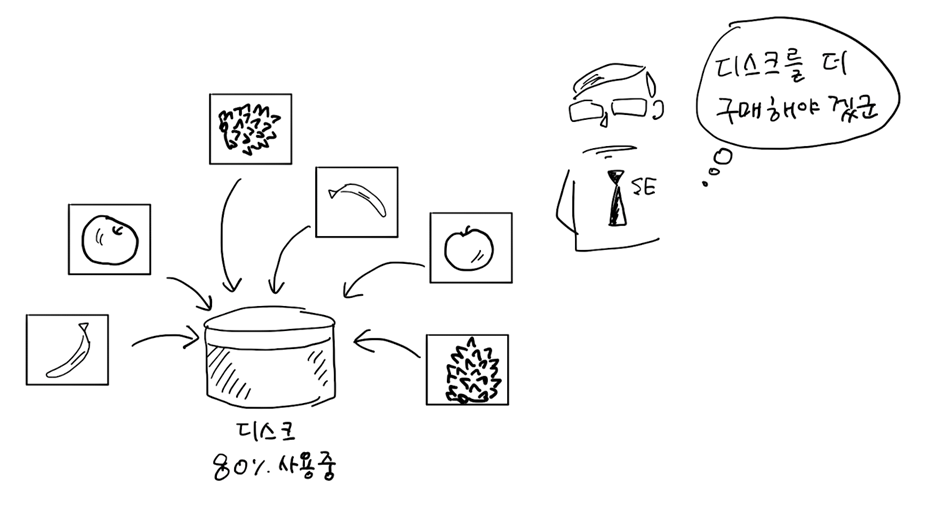

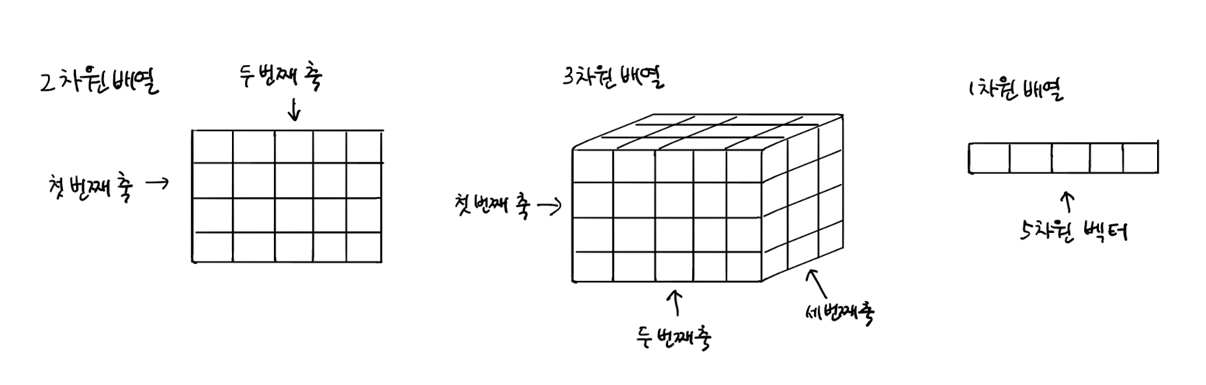

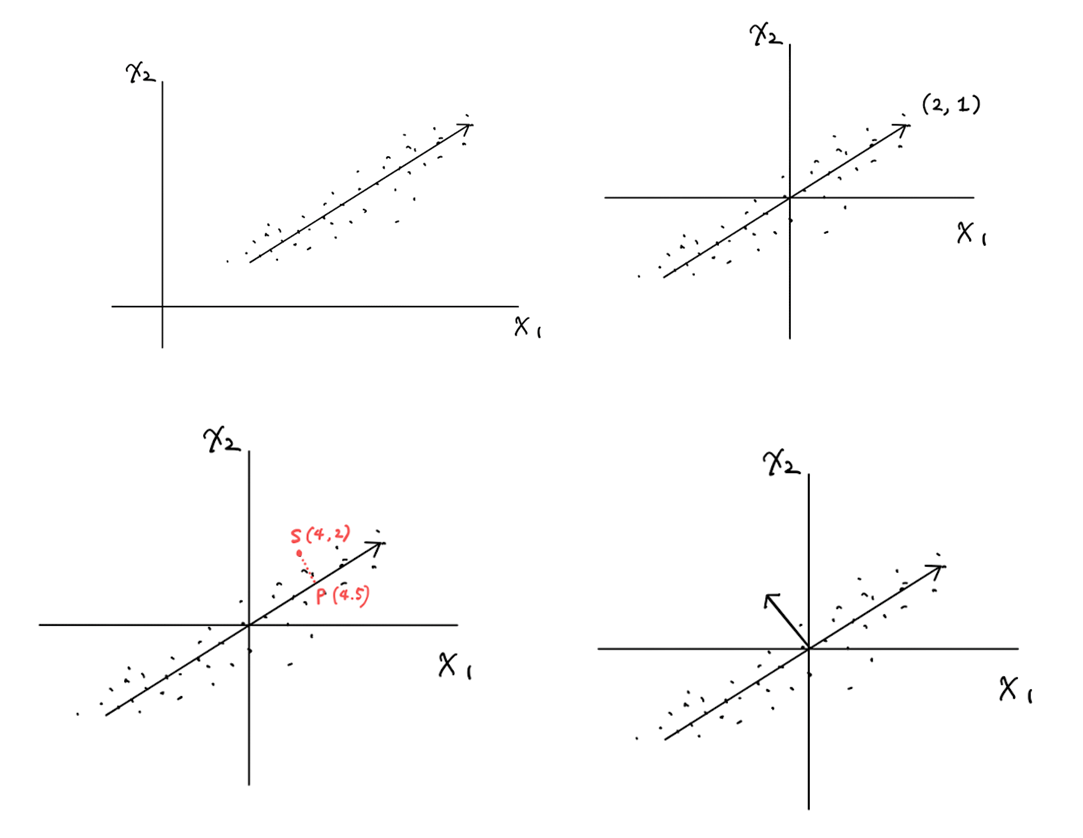

In [3]:
# 특성이 많으면 선형 모델의 성능이 높아지고 훈련 데이터에 쉽게 과대적합된다.

# 차원축소 : 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터
#   크기를 줄이고 지도학습 모델의 성능을 향상시키기 위함

# 주성분 분석 (PCA (Principal Component Analysis))
#   : 줄어준 차원에서 다시 원본 차원으로 손실을 최대한 줄이면서 복원할 수 도 있어야 함
# https://ddongwon.tistory.com/114

# 주성분 분석은 데이터에 있는 분산이 큰 방향을 찾는것으로 이해(분산 : 데이터가 널리 퍼져있는 정도)
#   -> 데이터를 잘 표현하는 벡터?

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-12 01:35:58--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-12 01:35:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-12 01:35:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

In [4]:
import numpy as np

fruits = np.load('fruits_300.npy')  # 300장에 100가로픽셀 * 100세로픽셀 데이터를 fruits 변수에 넣음

fruits_2d = fruits.reshape(-1, 100*100) # 300장에 10000짜리 2차원으로 변환

from sklearn.decomposition import PCA   # 주성분 분석 알고리즘사용

# 사이킷런의 decomposition 모듈 아래 PCA 클래스로 활용
pca = PCA(n_components=50) # PCA 클래스를 만들 때 주성분의 개수를 지정함 300개가 50로 압축됨
pca.fit(fruits_2d) # 비지도 학습임으로 타킷 제외 학습

PCA(n_components=50)

In [6]:
print(pca.components_.shape)    # components_ 주성분이 들어있는 속성 50개로 압축됨
# 50개의 속성에 10000개의(100x100해상도) 특성 개수

(50, 10000)


In [7]:
print(fruits_2d.shape)

(300, 10000)


In [9]:
import matplotlib.pyplot as plt

def draw_fruits(arr, tatio=1):
  n = len(arr)    # n은 샘플 개수입니다

  # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
  rows = int(np.ceil(n/10))
  # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*tatio, rows*tatio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:    # n 개까지만 그립니다.
        axs[i,j].imshow(arr[i*10+j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

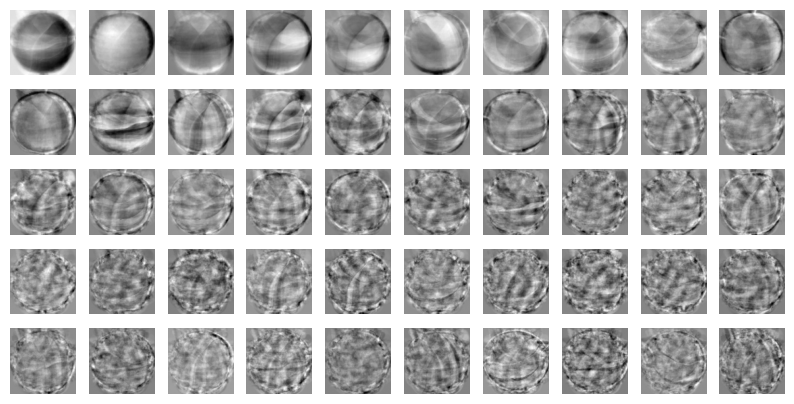

In [10]:
draw_fruits(pca.components_.reshape(-1, 100, 100))  # 10 * 5 = 50

In [15]:
# 주성분 분석을 이용해서 300개의 사진을 50개로 줄여 봤다.
# 이번에는 원본 데이터의 특성의 개수를 10,000개에서 50개로 줄여보자.
#   -> 원본의 분해

# transform()메서드를 사용해서 원본데이터의 차원(특성)을 줄여본다.
fruits_pca = pca.transform(fruits_2d)
print(fruits_2d.shape)
print(fruits_pca.shape)

(300, 10000)
(300, 50)


In [17]:
# 10000개의 특성을 50개로 줄였으니 어느정도의 손실이 발생할 수 있다.
# 하지만 최대한 분산이 큰방향으로 데이터를 투영했기 때문에
# 원본데이터를 상당부분 재구성이 가능하다.
# 원본 데이터의 재구성 -> inverse_transform()
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


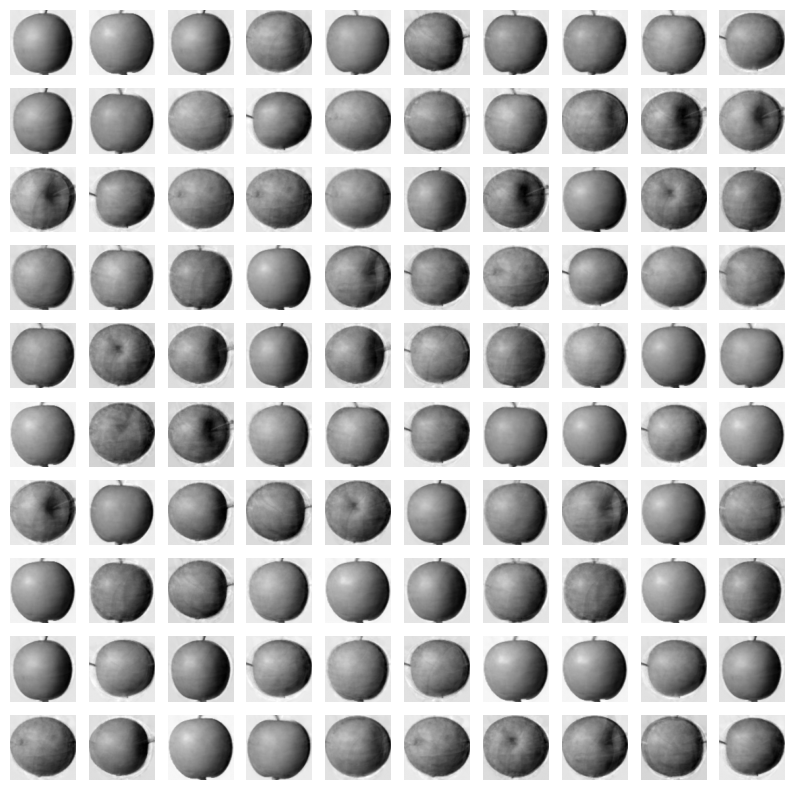

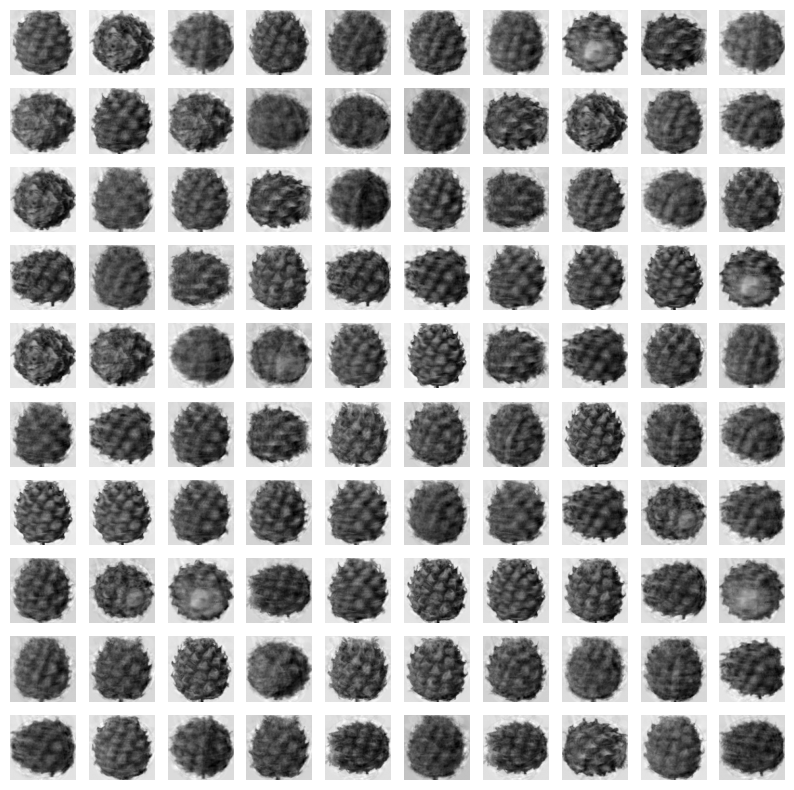

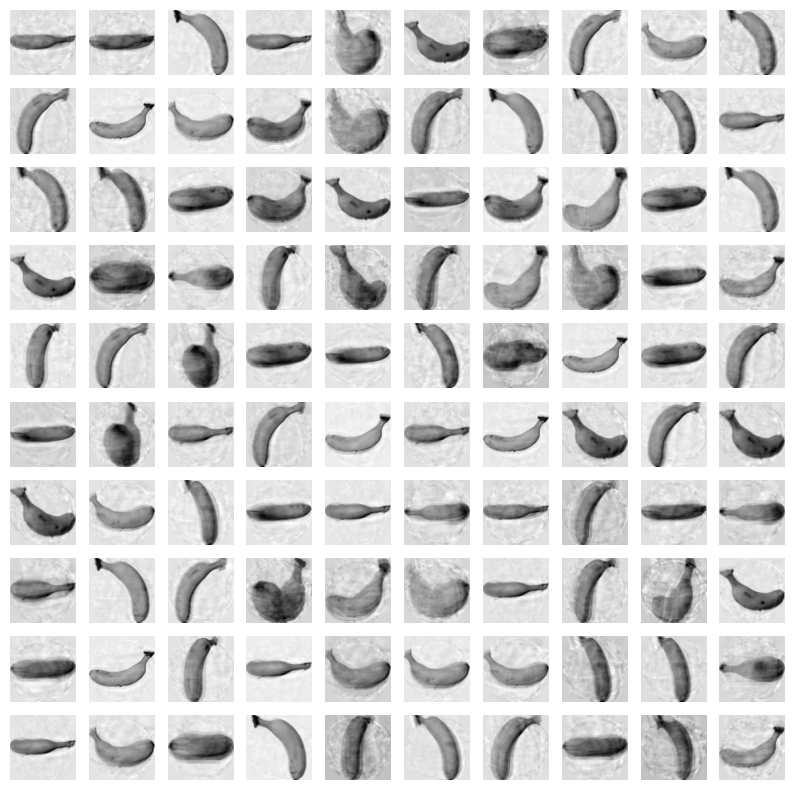

In [18]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

In [19]:
# 거의 모든 파일이 잘 복원된듯 보인다. 특징을 잘 찾아낸 것 같고
# 일부 흐리고 번진 부분도 있지만 중요한 특성은 아님
# 불과 50개의 특성을 10,000로 늘린 것을 감안하면 성공적인듯 하다.
# 만약 주성분을 최대로 사용했다면 완벽하게 원본 데이터를 재구성할 수 있을 것이다.
# 50개의 특성은 얼마나 분산을 보존하고 있을까를 알아보자.

# 설명된 분산(explained variance) : 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
# PCA 클래스의 explained_variance_ratio 에 주성분의 설명된 분산 비율이 기록되어 있음
# 첫번째 주성분의 설명된 분산이 가장큼
# 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율

print(np.sum(pca.explained_variance_ratio_))
# 92%가 넘는 분산을 유지하고 있음 (이미지 품질)

0.9215495967795626


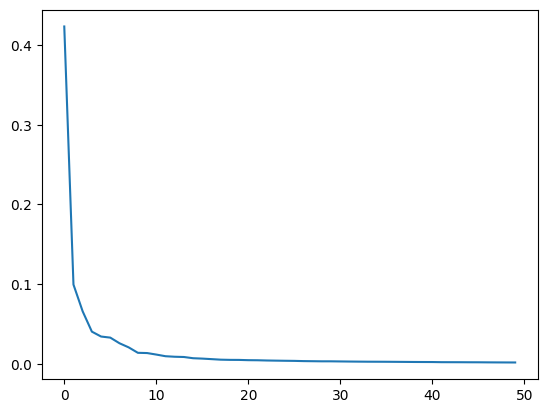

In [21]:
# 앞에서 50개의 특성에서 원본 데이터를 복원 했을 대 원본 이미지의 품질이 높은 이유가 됨
# 설명된 분산의 비율을 그래프로 그려볼 수 있다.
# 적절한 주성분의 개수를 찾는데 도움이 된다.

plt.plot(pca.explained_variance_ratio_)
# 그래프의 처음 10개가 주성분의 대부분을 표현하고 있음
# 현재 10000개의 픽셀의 성분을 50개로 줄였지만 더 줄여서 15개까지도 생각해볼 수 있겠다.

In [23]:
# 위에 만든 주성분으로 지도학습 모델에 적용 해보자.
# 전에 사용했던 로지스틱 회귀 모델을 사용

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0] * 100 + [1] * 100 + [2] * 100)

print(target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2]


In [29]:
from sklearn.model_selection import cross_validate    # cross_validate 크로스 검증

scores = cross_validate(lr, fruits_2d, target)    # fruits_2d 원본데이터를 사용해 봄 10000픽셀

print(np.mean(scores['test_score']))    # 99%의 과대적합됨
# 특성이 10000개나 되기 때문에 300개의 샘플에서는 과대적합 모델이 됨
print(np.mean(scores['fit_time']))      # 0.82초 정도 걸림

0.9966666666666667
1.6086381435394288


In [31]:
scores = cross_validate(lr, fruits_pca, target)

print(np.mean(scores['test_score']))    # fruits_pca PCA로 축소한 자료사용 50픽셀
print(np.mean(scores['fit_time']))

0.9966666666666667
0.0743751049041748


In [33]:
# 앞에서는 PCA클래스를 사용할때 n_components 매개변수에 주성분 개수를 50개로 진행 해봤다.
# 이 대신 비율로 줄 수도 있다. 50%에 달하는 주성분을 찾도록 분석을 해본다.

pca = PCA(n_components=0.5)   # 주성분 개수대신 0~1 사이에 실수로 입력
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [35]:
print(pca.n_components_)    # 10000개의 특성을 2개로 압축해 버렸네요!!!
# 2개의 주성분으로 2개의 특성만으로 원본데이터의 분산 50%를 표현할 수 있다.

2


In [37]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)   # 300개의 요소에 2개의 주성분

(300, 2)


In [40]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))  # 99% 과대적합
print(np.mean(scores['fit_time']))    # 0.03초 훈련시간이 약간 증가
##################### 로지스틱회귀 + PCA 끝 =========================

0.99
0.03157482147216797


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [42]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(fruits_pca.shape)

(300, 2)


In [43]:
print(np.unique(km.labels_, return_counts=True))
# 전에 있던 값  (array([0, 1, 2], dtype=int32), array([112,  98,  90]))
# PCA로 만든 값 (array([0, 1, 2], dtype=int32), array([110,  99,  91]))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))
